In [1]:
import numpy as np
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn 
from pandas.api.types import CategoricalDtype
sns.set(style="ticks", color_codes=True)

C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-79V6INH\DANIEL1;"
                      "Database=pharmacy_1;"
                      "Trusted_Connection=yes;")

In [3]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM dbo.pro_1')
full_data=cursor

In [5]:
df = pd.read_sql( 'SELECT * FROM dbo.pro_1',conn)
df.head()

,year,yyyy_mm,store_code,district,sku,item_name,genery,affiliation,customers,price,tranq
0,2017,201711,5224,477,1000084527,ELIQUIS TAB 5mg 60,1000084527,20110,1,3.56,60
1,2017,201711,5224,477,1000110761,PAMID TAB 2.5mg 30,1999004071,20120,1,0.35,30
2,2017,201711,5224,477,1000111352,EZECOR TAB 10mg 30,1999003192,20120,1,0.51,30
3,2017,201711,5224,477,1110006071,VENOFER INJ 100mg 5,1999001402,20110,1,7.7,8
4,2017,201711,5224,477,1110014724,LIPITOR TAB 20mg 30,1999001542,20120,1,0.16,30


In [6]:
df1=df
df1=df.loc[(df['yyyy_mm'] <= '201906')]
df1.head()

,year,yyyy_mm,store_code,district,sku,item_name,genery,affiliation,customers,price,tranq
0,2017,201711,5224,477,1000084527,ELIQUIS TAB 5mg 60,1000084527,20110,1,3.56,60
1,2017,201711,5224,477,1000110761,PAMID TAB 2.5mg 30,1999004071,20120,1,0.35,30
2,2017,201711,5224,477,1000111352,EZECOR TAB 10mg 30,1999003192,20120,1,0.51,30
3,2017,201711,5224,477,1110006071,VENOFER INJ 100mg 5,1999001402,20110,1,7.7,8
4,2017,201711,5224,477,1110014724,LIPITOR TAB 20mg 30,1999001542,20120,1,0.16,30


In [7]:
df1['tranq'] = df1['tranq'].str.replace(r"[\"\',]", '')

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df1['price'] = df1['price'].str.replace(r"[\"\',]", '')

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df1['tranq'] = df1['tranq'].astype(float)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df1['tranq'] = df1['tranq'].astype(int)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df1['price'] = df1['price'].astype(float)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df1['customers'] = df1['customers'].astype(int)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df1.dtypes

year            object
yyyy_mm         object
store_code      object
district        object
sku             object
item_name       object
genery          object
affiliation     object
customers        int32
price          float64
tranq            int32
dtype: object

In [ ]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(dfpy.sample(n = 1000000))
#prof.to_file(output_file='output.html')
#prof.to_notebook_iframe()

In [14]:
dfpy = df1[['tranq','price','customers']]

In [ ]:
#from pyMechkar import exploreData
#exploreData(dfpy.sample(n = 1000000), y="tranq")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000288E3F6B320>,
      dtype=object)

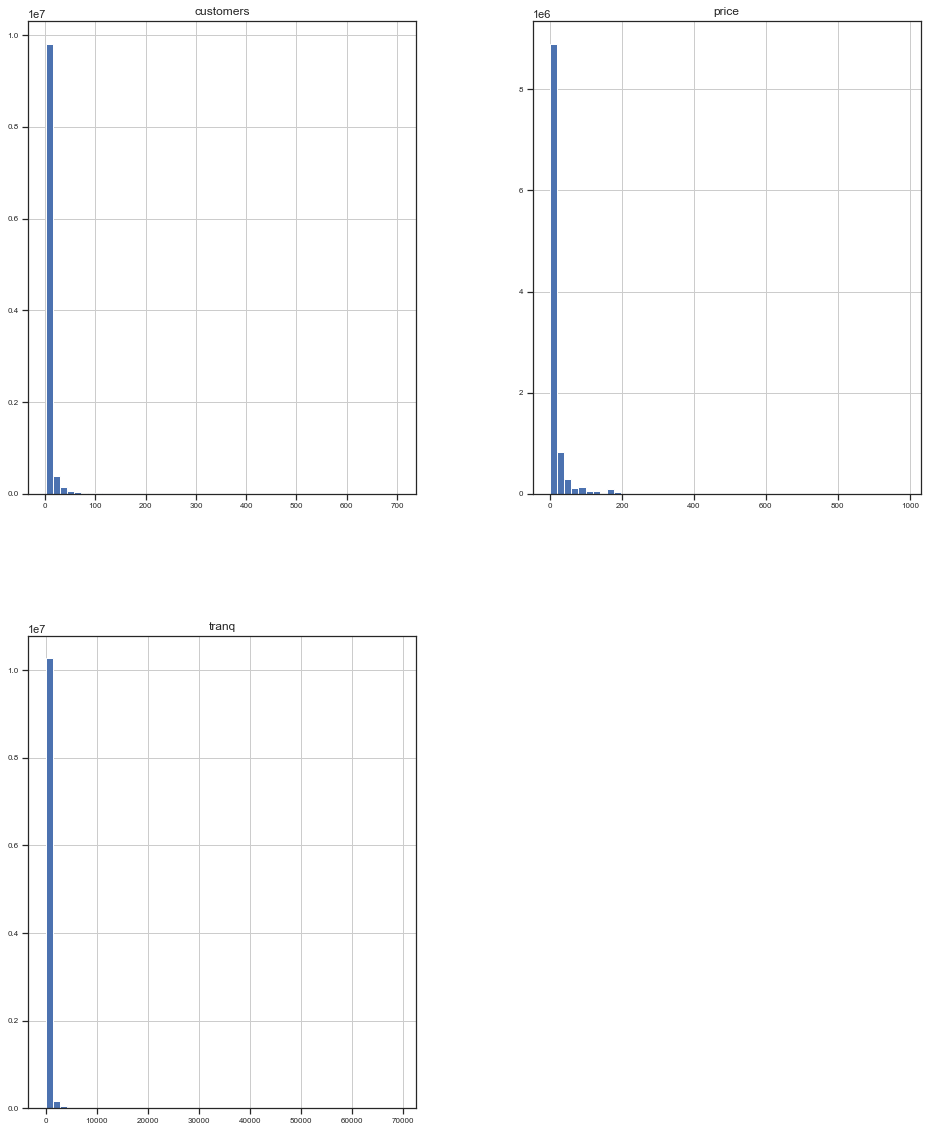

In [15]:
dfpy.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


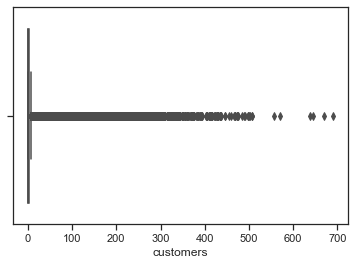

In [15]:
## Using box (Wiskers) plot
outl = sns.boxplot(df1.sample(n = 1000000)['customers'])

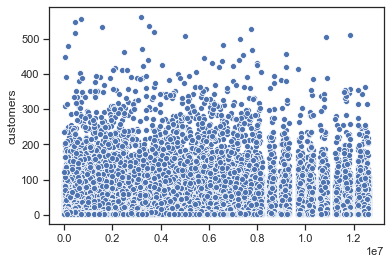

In [16]:
###  using scatterplots
sns.scatterplot(x=df1.sample(n = 1000000).index,y=df1.sample(n = 1000000)['customers'])

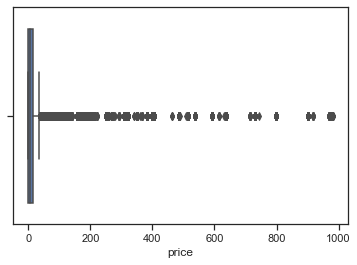

In [18]:
## Using box (Wiskers) plot
outl = sns.boxplot(df1.sample(n = 1000000)['price'])

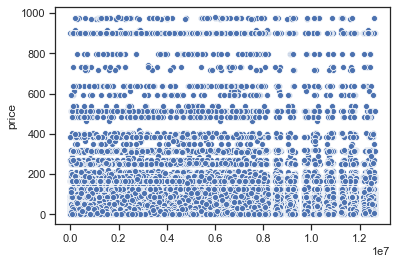

In [17]:
###  using scatterplots
sns.scatterplot(x=df1.sample(n = 1000000).index,y=df1.sample(n = 1000000)['price'])

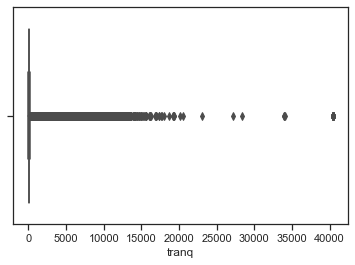

In [19]:
## Using box (Wiskers) plot
outl = sns.boxplot(df1.sample(n = 1000000)['tranq'])

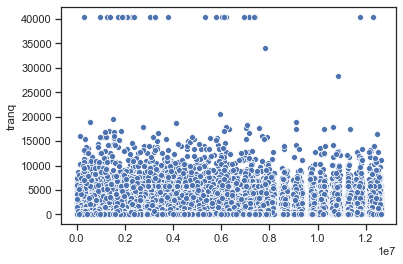

In [20]:
###  using scatterplots
sns.scatterplot(x=df1.sample(n = 1000000).index,y=df1.sample(n = 1000000)['tranq'])